# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [36]:
import pandas as pd
import numpy as np
from statsmodels.stats.power import TTestIndPower, TTestPower
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [48]:
import flatiron_stats as fs

In [61]:
f1 = 'FormalEducation'
f2 = 'AdjustedCompensation'
f1c1 = "Master's degree"
f1c2 = "Bachelor's degree"
subset = df[(~df[f1].isnull()) & (~df[f2].isnull())]
masters = subset[subset[f1]==f1c1][f2]
bachelors = subset[subset[f1]==f1c2][f2]

In [67]:
df[f1].value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

Comparison of AdjustedCompensation for Master's degree and Bachelor's degree
Median Values: 	s1: 53812.17 	s2: 38399.4
Mean Values: 	s1: 69139.9 	s2: 64887.1
Sample sizes: 	s1: 1990 	s2: 1107
Welch's t-test p-value: 0.33077639451272445


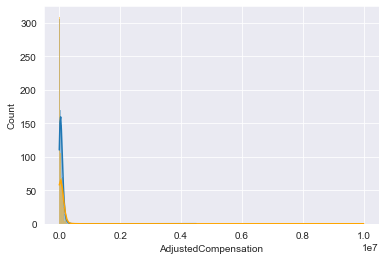

In [66]:
sns.histplot(masters, label='masters', kde=True)
sns.histplot(bachelors, color='orange', label='bachelors', kde=True)

print('Comparison of {} for {} and {}'.format(f2, f1c1, f1c2))
print("Median Values: \ts1: {} \ts2: {}".format(round(s1.median(),2), round(s2.median(),2)))
print("Mean Values: \ts1: {} \ts2: {}".format(round(s1.mean(),2), round(s2.mean(),2)))
print('Sample sizes: \ts1: {} \ts2: {}'.format(len(s1), len(s2)))
print("Welch's t-test p-value:", fs.p_value_welch_ttest(s1, s2))

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [68]:
f1c3 = "Doctoral degree"
doctoral = subset[subset[f1]==f1c3][f2]
doctoral

22       100000.000
32       172144.440
34       133000.000
61        15000.000
72        43049.736
            ...    
25875     71749.560
25966     12000.000
26012    123553.200
26038    170000.000
26203    200000.000
Name: AdjustedCompensation, Length: 967, dtype: float64

## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [70]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = '{} ~ C({})'.format(f2,f1)
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!